In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import re

# read in our data
landslides = pd.read_csv("../input/landslide-events/catalog.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
landslides.head()


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


Even though the date field appears to be a date, it may only be an object, like string. 

In [3]:
print(landslides['date'].dtype)

object


Python date have the dtype, datetime64. They may be converted using strftime.

In [4]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format='%m/%d/%y')

In [5]:
landslides['date_parsed'].head()


0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

I If you don't want to bother with an strftime format string; or, there's a mixture of formats, use infer_datetime_format. It will be slower.

In [6]:
landslides['date_parsed2'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)

In [7]:
landslides[['date_parsed','date_parsed2']].head()

,date_parsed,date_parsed2
0,2007-03-02,2007-03-02
1,2007-03-22,2007-03-22
2,2007-04-06,2007-04-06
3,2007-04-14,2007-04-14
4,2007-04-15,2007-04-15


In [8]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

In [9]:
# Plot # of landslides by day of month. They should be uniformly distributed.
day_of_month_landslides = day_of_month_landslides.dropna()

/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed', ylabel='Density'>

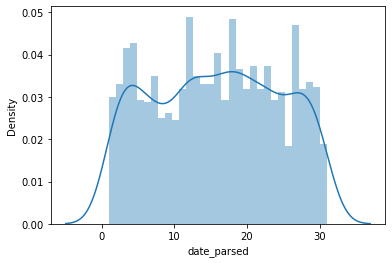

In [10]:
sns.distplot(day_of_month_landslides, bins=31)

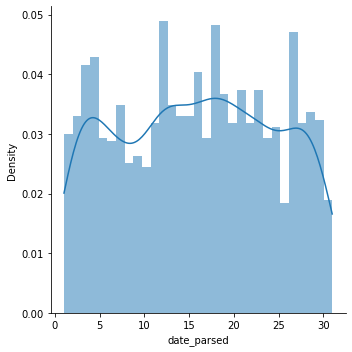

In [11]:
sns.displot(data=day_of_month_landslides, bins=31, stat='density', kde=True, lw=0)

### Exercise: Parsing Dates
You'll be working with the "Date" column from the earthquakes dataframe. Investigate this column now: does it look like it contains dates? What is the dtype of the column?

In [12]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

#### 1) Check the datatype of our date column
You'll be working with the "Date" column from the earthquakes dataframe. Investigate this column now: does it look like it contains dates? What is the dtype of the column?

In [13]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

#### 2) Convert our date columns to datetime
Most of the entries in the "Date" column follow the same format: "month/day/four-digit year". However, the entry at index 3378 follows a completely different pattern. Run the code cell below to see this.
<p>
This does appear to be an issue with data entry: ideally, all entries in the column have the same format. We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.


In [14]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


In [15]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

# Looks like there are two more rows that has a date in a different format. 
# Run the code cell below to obtain the indices corresponding to those rows and print the data.

indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [16]:
# Define a function that will convert both of the formats being used

from datetime import datetime
import sys
def fdate(x):
    # Some of the dates are not %m/%d/%Y
    if len(x)>10:
        return datetime.strptime(x[:10],'%Y-%m-%d')
    else:
        return datetime.strptime(x,'%m/%d/%Y')

In [17]:
earthquakes['Date'].apply(fdate)

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: Date, Length: 23412, dtype: datetime64[ns]

In [18]:
# Alternatively. This allows more than one column to be used in the calculation

earthquakes.apply(lambda x: fdate(x['Date']), axis='columns')

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Length: 23412, dtype: datetime64[ns]

Given all of this information, it's your turn to create a new column "date_parsed" in the earthquakes dataset that has correctly parsed dates in it.

**Note:** When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns. Do not remove any rows from the dataset.

In [19]:
earthquakes['date_parsed'] = earthquakes['Date'].apply(fdate)

In [20]:
# Show the problem entries
earthquakes.loc[[3378, 7512, 20650], "date_parsed"]

3378    1975-02-23
7512    1985-04-28
20650   2011-03-13
Name: date_parsed, dtype: datetime64[ns]

### 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [21]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes.date_parsed.dt.day

### 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed', ylabel='Density'>

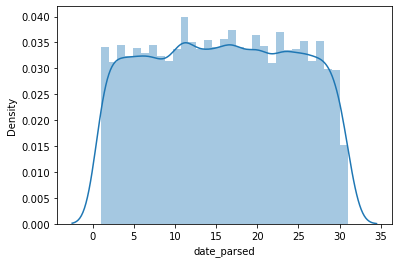

In [22]:
sns.distplot(day_of_month_earthquakes, bins=31)

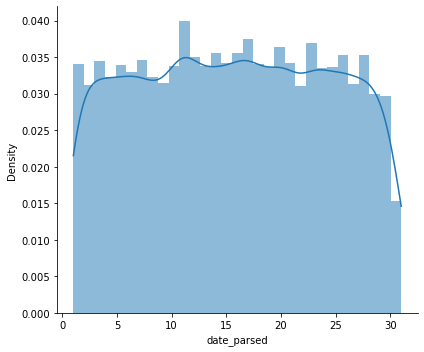

In [23]:
sns.displot(data=day_of_month_earthquakes, bins=31, stat='density', kde=True, lw=0, aspect=1.2)

### (Optional) Bonus Challenge

For an extra challenge, you'll work with a [Smithsonian dataset](https://www.kaggle.com/smithsonian/volcanic-eruptions) that documents Earth's volcanoes and their eruptive history over the past 10,000 years 

Run the next code cell to load the data.

In [24]:
# read in our data
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")

In [25]:
volcanos.head()


,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [26]:
# volcanos[ pat.search(volcanos['Last Known Eruption'].str)  ]
known_dates = volcanos[volcanos['Last Known Eruption'] != 'Unknown'].index


In [27]:
volcanos_dated = volcanos.iloc[known_dates]

In [28]:
def cdate(x):
    bce = re.search(r'(\d*)\s(.?CE)', x)
#     return int(bce.group(1)) if bce.group(2)=='CE' else -int(bce.group(1))
    return int(bce.group(1)) if bce.group(2)=='CE' else 0


In [29]:
cdate('3600 CE')

3600

In [30]:
for x in volcanos_dated['Last Known Eruption']:
    try:
        d = cdate(x)
    except:
        print('Error for x = ' + x)

In [31]:
volcanos_dated['eruption'] = volcanos_dated['Last Known Eruption'].apply(cdate)

/tmp/ipykernel_425/2357302073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volcanos_dated['eruption'] = volcanos_dated['Last Known Eruption'].apply(cdate)


In [32]:
volcanos_dated.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,eruption
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km),0
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),0
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),0
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km),1282
5,211003,Vulsini,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,104 BCE,42.600,11.93,800,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),0


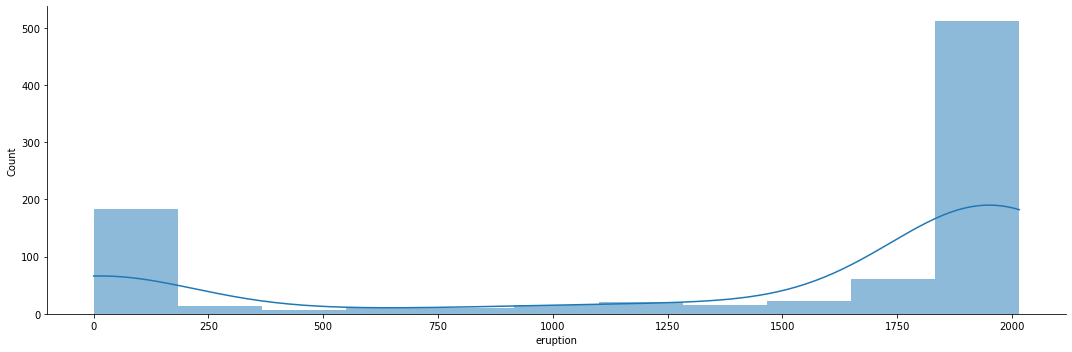

In [33]:
sns.displot(data=volcanos_dated, x='eruption', stat='count', kde=True, lw=0, aspect=3)